# Neural Networks

(example from *sklearn* and https://github.com/amirziai/deep-learning-coursera)

## Problem

### Determine if an image has a cat or not, given labeled data

<table>
  <tr>
    <th>Cat</th>
    <td> <img src="images/cat_1.jpg" width="150"></td>
    <td> <img src="images/cat_2.png" width="150"></td>
   </tr> 
   <tr>
      <th>Non Cat</th>
      <td> <img src="images/noCat_1.jpeg" width="150"></td>
      <td> <img src="images/noCat_2.jpg" width="150"></td>
  </tr>
</table>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import neural_network

from utils import load_dataset

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalization

In [3]:
X_train = X_train_orig.reshape(X_train_orig.shape[0], -1)
X_test = X_test_orig.reshape(X_test_orig.shape[0], -1)

X_train = X_train / 255.
X_test = X_test / 255.

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

In [4]:
print(f'Dimensiones de X: {X_train.shape}')
print(f'Dimensiones de Y: {Y_train.shape}')

Dimensiones de X: (209, 12288)
Dimensiones de Y: (209, 1)


Las imágenes son de **64 (alto) x 64 (largo) x 3 (ancho)**.

y = [0], it is a non-cat picture.


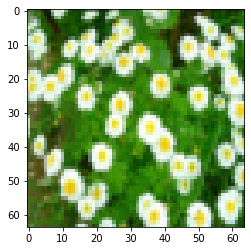

In [5]:
index = 123
plt.imshow(X_train_orig[index])

print(f'y = {Y_train[index]}, it is a {classes[np.squeeze(Y_train[index])].decode("utf-8")} picture.')

## sklearn implementation

In [6]:
clf = neural_network.MLPClassifier(solver='lbfgs',
                                   alpha=0.00001, 
                                   hidden_layer_sizes=(5, 2),
                                   random_state=1,
                                   max_iter=1000)

clf.fit(X_train, Y_train.ravel());

In [7]:
predictions = clf.predict(X_train)
print(f'Accuracy: {np.sum(Y_train.ravel() == predictions) / float(Y_train.size) * 100}')

Accuracy: 80.38277511961722


In [8]:
predictions = clf.predict(X_test)
print(f'Accuracy: {np.sum(Y_test.ravel() == predictions) / float(Y_test.size) * 100}')

Accuracy: 80.0


In [9]:
predictions, Y_test.ravel()

(array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 1, 0]),
 array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0]))

# What if we implement it?

(This implementation is for a *logistic regression* classifier)

In [10]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [11]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b

In [12]:
def propagate(w, b, X, Y):
    m = X.shape[1]

    # FORWARD PROPAGATION
    # compute activation
    A = sigmoid(np.dot(w.T, X) + b)
    # compute cost
    cost = (-1.0 / m) * np.sum(Y * np.log(A) + (1.0 - Y) * np.log(1.0 - A))

    # BACKWARD PROPAGATION
    dw = (1.0 / m) * np.dot(X, (A - Y).T)
    db = (1.0 / m) * np.sum(A - Y)

    cost = np.squeeze(cost)
    grads = {'dw': dw, 'db': db}

    return grads, cost

In [13]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):    
    costs = []

    for i in range(num_iterations):
        # Cost and gradient
        grads, cost = propagate(w, b, X, Y)
        if i % 100 == 0:
            costs.append(cost)
        dw = grads['dw']
        db = grads['db']

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if print_cost and i % 100 == 0:
            print(f'Cost after iteration {i}: {cost}')

    params = {'w': w, 'b': b}

    grads = {'dw': dw, 'db': db}

    return params, grads, costs

In [14]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    Y_prediction[A >= 0.5] = 1
    Y_prediction[A <= 0.5] = 0
    return Y_prediction

In [15]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):

    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters['w']
    b = parameters['b']

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print(f'train accuracy: {100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100}')
    print(f'test accuracy: {100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100}')

    d = {'costs': costs,
         'Y_prediction_test': Y_prediction_test,
         'Y_prediction_train': Y_prediction_train,
         'w': w,
         'b': b,
         'learning_rate': learning_rate,
         'num_iterations': num_iterations}

    return d

In [16]:
d = model(X_train.T,
          Y_train.ravel(),
          X_test.T,
          Y_test.ravel(),
          num_iterations=5000,
          learning_rate=0.001,
          print_cost=True)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.591289426000354
Cost after iteration 200: 0.5557961107127088
Cost after iteration 300: 0.5289765131562365
Cost after iteration 400: 0.5068812917435518
Cost after iteration 500: 0.4878798632171657
Cost after iteration 600: 0.47110827803124367
Cost after iteration 700: 0.4560458096982851
Cost after iteration 800: 0.4423502279336529
Cost after iteration 900: 0.42978171535077836
Cost after iteration 1000: 0.4181638209364329
Cost after iteration 1100: 0.40736174995821905
Cost after iteration 1200: 0.3972694687269798
Cost after iteration 1300: 0.38780160722954093
Cost after iteration 1400: 0.3788881303593958
Cost after iteration 1500: 0.3704706898360003
Cost after iteration 1600: 0.36250004228346355
Cost after iteration 1700: 0.35493416988240545
Cost after iteration 1800: 0.3477368794667972
Cost after iteration 1900: 0.34087673680743863
Cost after iteration 2000: 0.3343262415502277
Cost after iteration 2100: 0.32806117866

y = [1], you predicted that it is a non-cat picture.


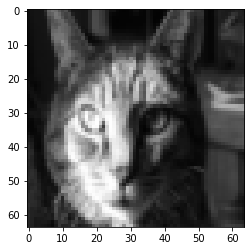

In [17]:
index = 30

num_px = X_train_orig[index].shape[0]
plt.imshow(X_test[index, :].reshape((num_px, num_px, 3)))

print(f'y = {Y_test[index]}, you predicted that it is a {classes[int(d["Y_prediction_test"][0, index])].decode("utf-8")} picture.')

# Keras

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [19]:
model = Sequential(
    [
        Dense(10, input_shape=(X_train.shape[1],), activation='relu'),
        Dropout(0.25),
        Dense(1, activation='sigmoid')
    ]
)

In [20]:
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics='accuracy'
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                122890    
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 122,901
Trainable params: 122,901
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test), verbose=1);

Epoch 1/100
7/7 [==============================] - 1s 91ms/step - loss: 0.8024 - accuracy: 0.5589 - val_loss: 0.9957 - val_accuracy: 0.3400
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6926 - accuracy: 0.6474 - val_loss: 0.7167 - val_accuracy: 0.3200
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6784 - accuracy: 0.6386 - val_loss: 0.6642 - val_accuracy: 0.5800
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6810 - accuracy: 0.6385 - val_loss: 0.7521 - val_accuracy: 0.3400
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6560 - accuracy: 0.6628 - val_loss: 0.9449 - val_accuracy: 0.3400
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6536 - accuracy: 0.6916 - val_loss: 0.7695 - val_accuracy: 0.3400
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6639 - accuracy: 0.6401 - val_loss: 0.8485 - val_accuracy: 0.3400
Epoch 8/100
7/7 [===

7/7 [==============================] - 0s 10ms/step - loss: 0.4992 - accuracy: 0.6868 - val_loss: 0.6264 - val_accuracy: 0.7800
Epoch 60/100
7/7 [==============================] - 0s 10ms/step - loss: 0.5080 - accuracy: 0.6936 - val_loss: 1.3620 - val_accuracy: 0.3400
Epoch 61/100
7/7 [==============================] - 0s 10ms/step - loss: 0.4933 - accuracy: 0.7059 - val_loss: 0.6892 - val_accuracy: 0.6000
Epoch 62/100
7/7 [==============================] - 0s 10ms/step - loss: 0.4680 - accuracy: 0.7450 - val_loss: 0.6465 - val_accuracy: 0.6600
Epoch 63/100
7/7 [==============================] - 0s 11ms/step - loss: 0.4724 - accuracy: 0.7838 - val_loss: 0.8674 - val_accuracy: 0.4200
Epoch 64/100
7/7 [==============================] - 0s 10ms/step - loss: 0.4367 - accuracy: 0.7683 - val_loss: 0.6302 - val_accuracy: 0.6800
Epoch 65/100
7/7 [==============================] - ETA: 0s - loss: 0.4910 - accuracy: 0.75 - 0s 9ms/step - loss: 0.4854 - accuracy: 0.7282 - val_loss: 0.6900 - val_ac